# Analysis of ESC 2025 voting behavior

## Null Hypothesis: 
1. The voting behavior for the 2025 ESC follows a similar pattern to previous post-covid ESC entries (including 2022).
2. The differences between the 2025 polling and final results can be accounted for through statistical error from either: biased selection of polling respondents or statistically insignificant polling data.

## Testing the first part of the null hypothesis:
Look at the statistical significance and correlation of polling data over the past 5 years to see if there was a difference during the 2025 ESC. 

### If not statistically significant: 
Null hypothesis cannot be rejected.

### If statistically significant but correlation remains at a similar level compared to previous years: 
Null hypothesis cannot be rejected.

### If statistically significant and correlation changes greatly: 
The first part of the null hypothesis could potentially be rejected.

The analysis to confirm this cannot be made quantitatively as there is not any voting data released by the EBU, meaning my analysis will have to rely on qualitative factors to determine if the first null hypothesis can be rejected. 

The second null hypothesis can also be explored from a qualitative standpoint, depending on the results of the initial qualitative analysis. 

Correlation between polling and actual results for 2025 (excluding countries): 0.59 (p-value: 3.50e-03)


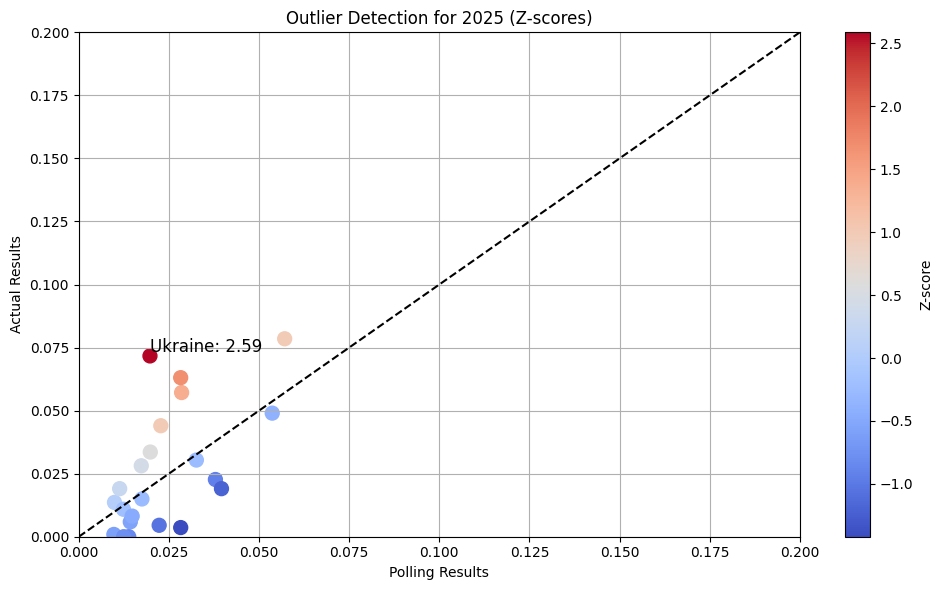

Correlation between polling and actual results for 2021: 0.87 (p-value: 8.09e-09)


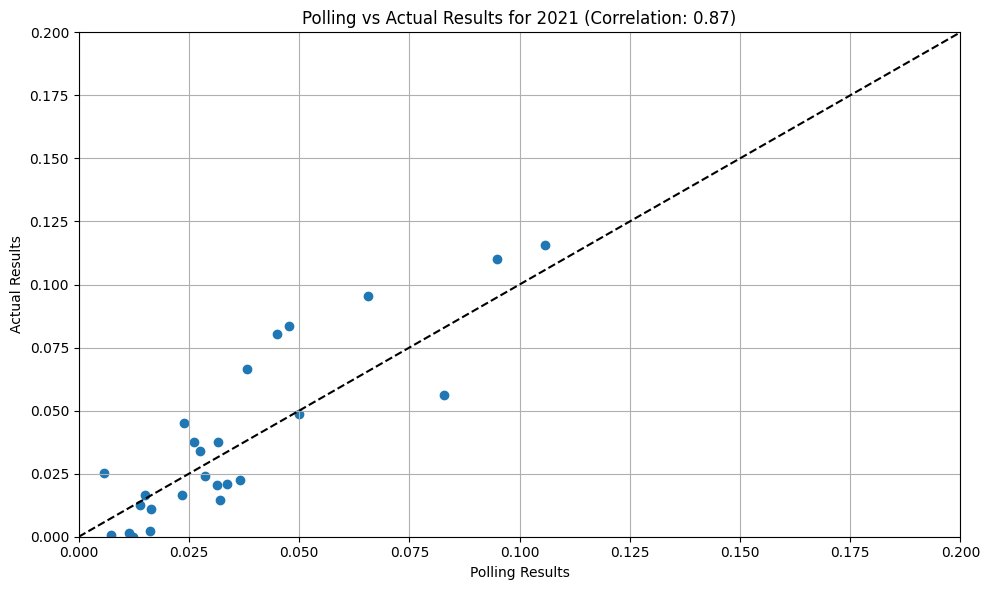

Correlation between polling and actual results for 2022: 0.70 (p-value: 1.24e-04)


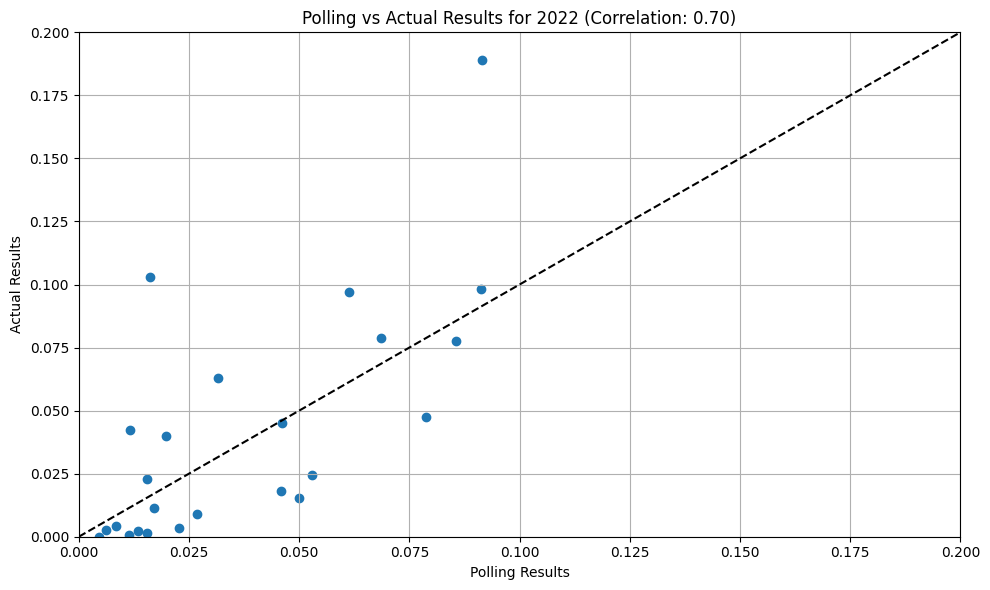

Correlation between polling and actual results for 2023: 0.78 (p-value: 3.12e-06)


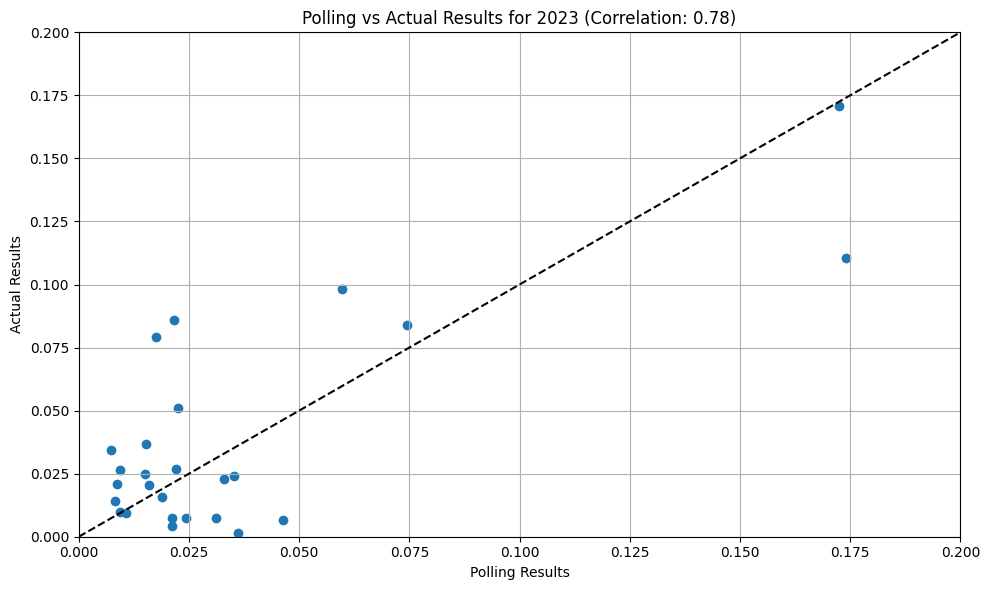

Correlation between polling and actual results for 2024: 0.81 (p-value: 9.68e-07)


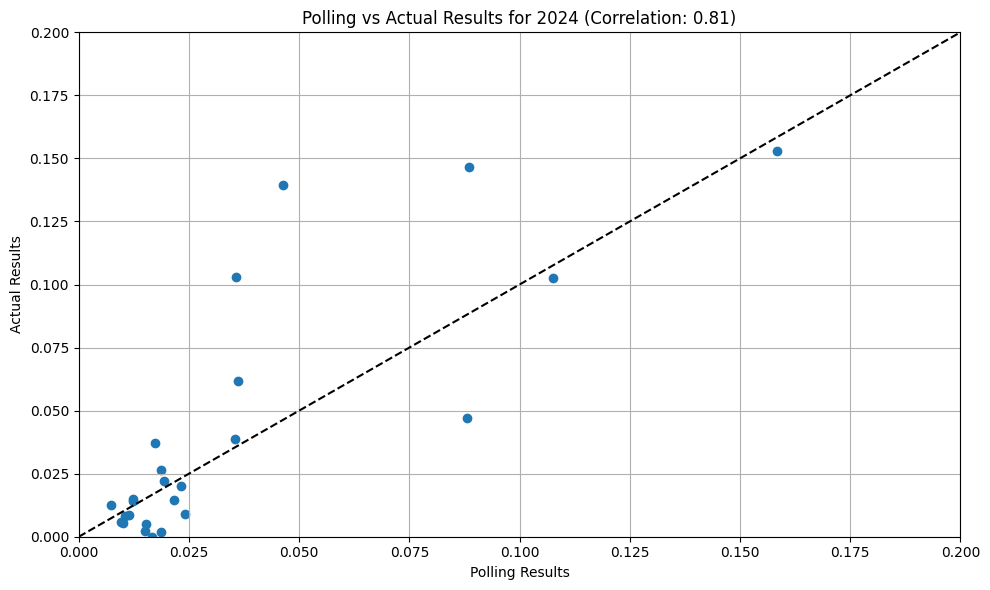

Correlation between polling and actual results for 2025: 0.59 (p-value: 1.51e-03)


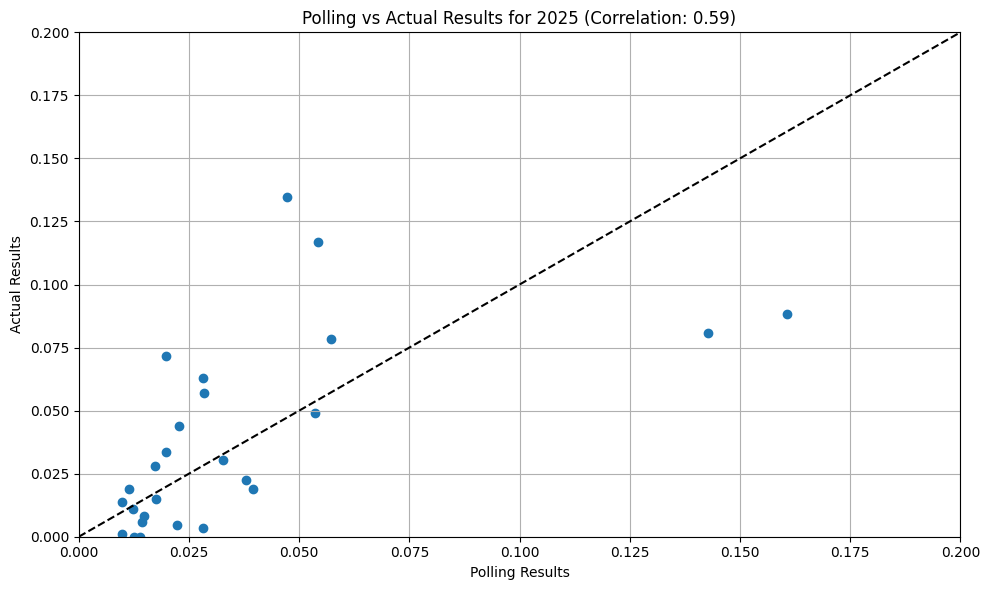

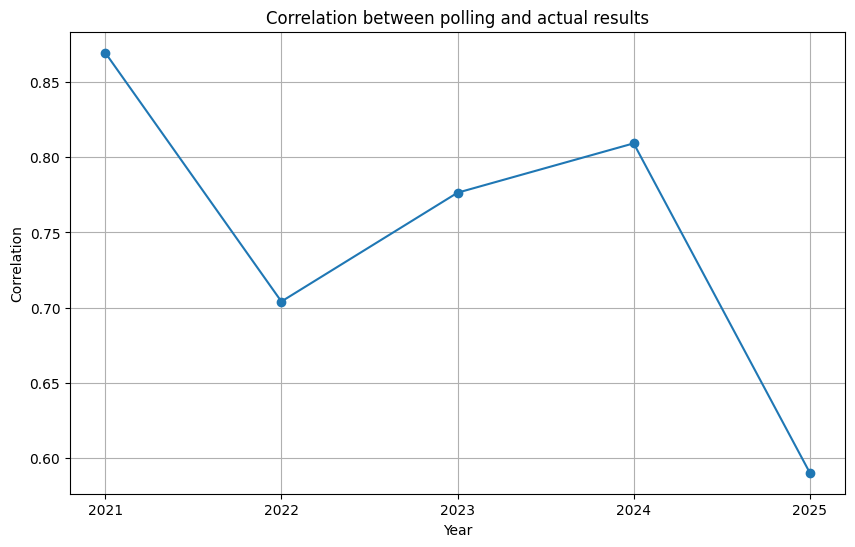

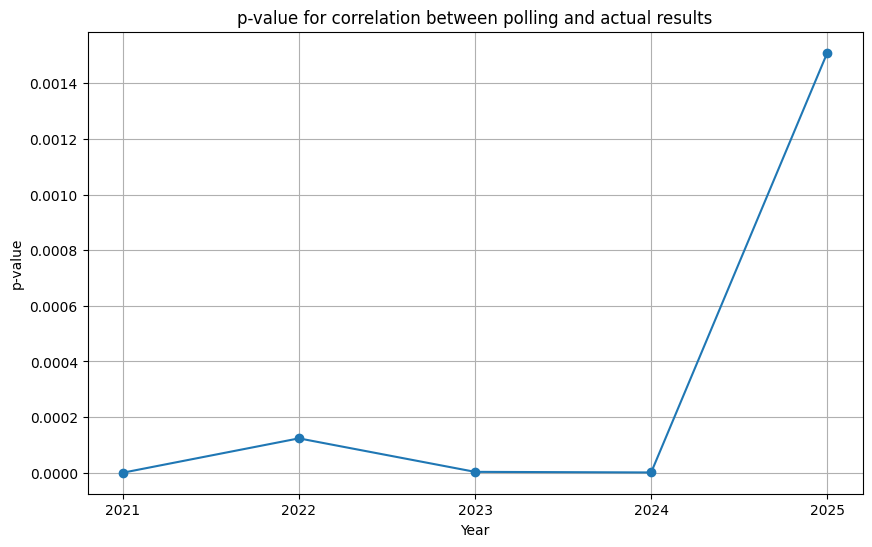

In [1]:
from analysis_tools import investigate_yearly_correlation

investigate_yearly_correlation()

# Conclusions from the data

- Pre-ESC polling is statistically significant and can account for a large share of the variance in the actual results. 
- The correlation between pre-ESC fan sentiment and the voting results changed greatly between the years 2024 and 2025, with a new correlation factor of 0.59.

To illustrate the significance of this, when Russia invaded Ukraine just months before the 2022 ESC, the correlation factor was 0.70, when Ukraine got 439 (of max 468) points from the public, despite only 9% of the pre-ESC polling favoring them as the preferred winner. 

At this point, we can safely state that something was different this year, regarding the connections between the pre-ESC polling and the actual voting during the night, compared to previous years of the ESC. 

#### We can thus safely reject the first part of the null hypothesis. 

# Discussion on the second part of the null hypothesis

First question to be answered: Are the differences between 2025 and previous entries explained through less accuracy across the board, or through a small number of outliers performing significantly different from the polling?

#### If the accuracy is lower across the board:
Look into the polling process to determine if there is significant selection bias among the respondents. 

#### If the accuracy is generally high, but there are a few large outliers: 
Look into the specific outliers and what could have caused the voting behavior for these to differ from the rest. 

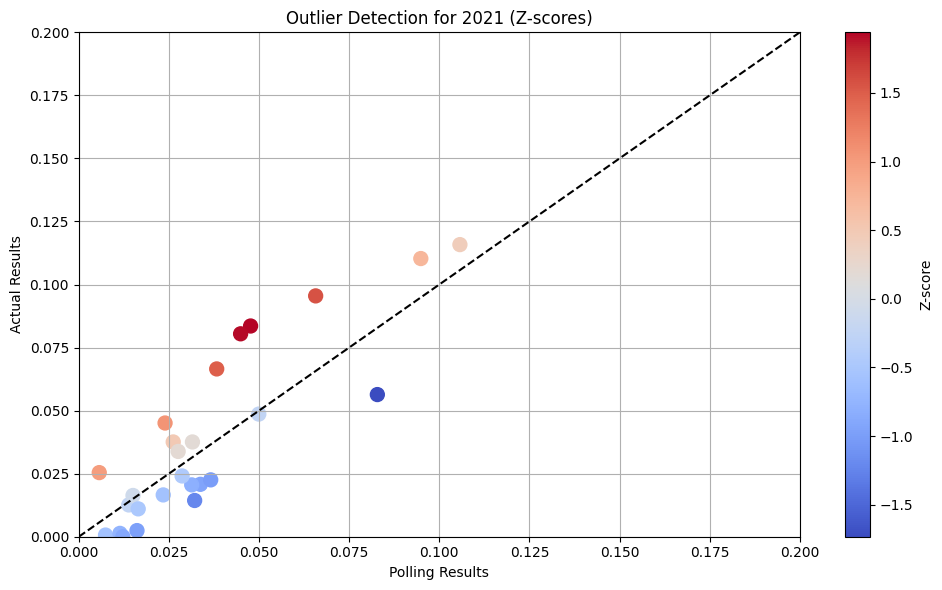

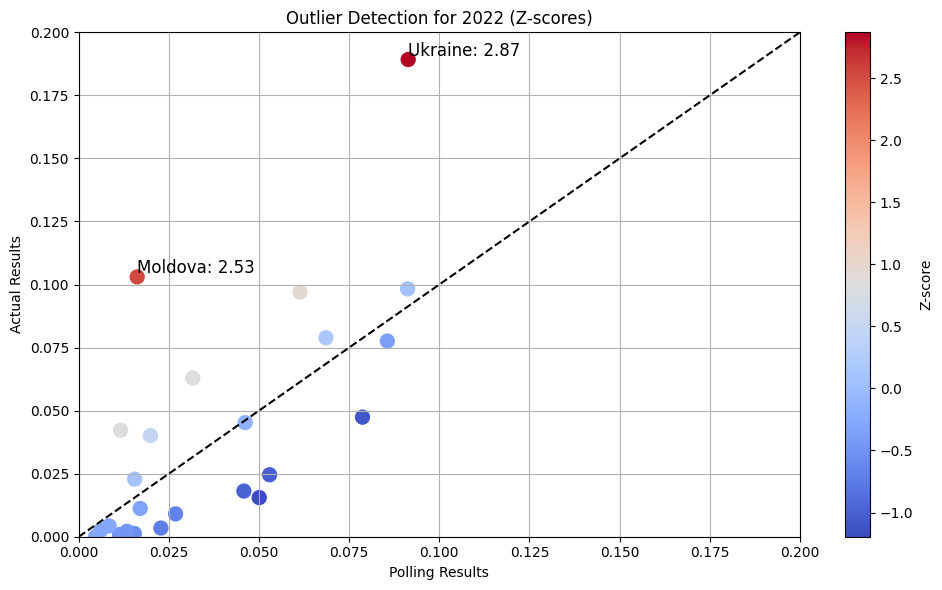

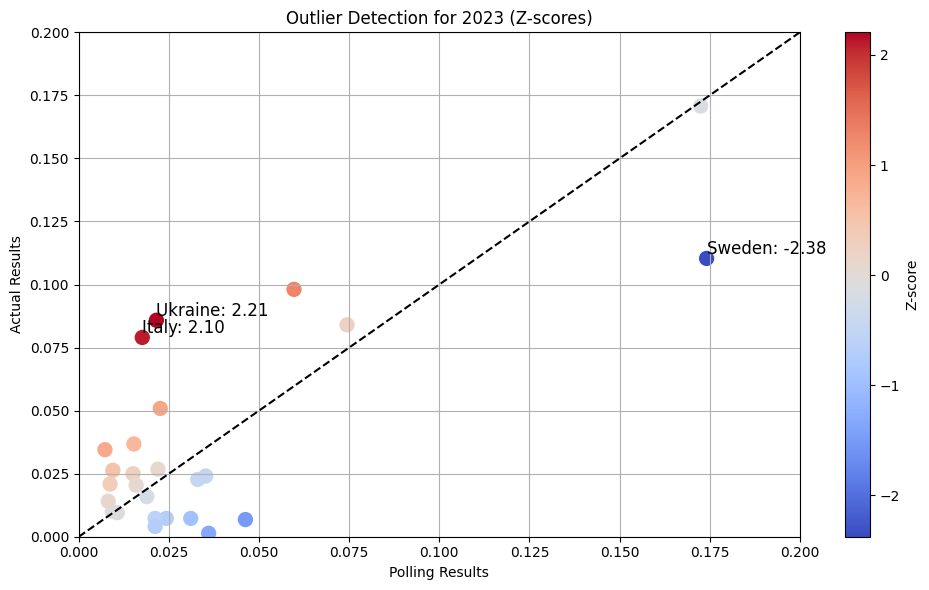

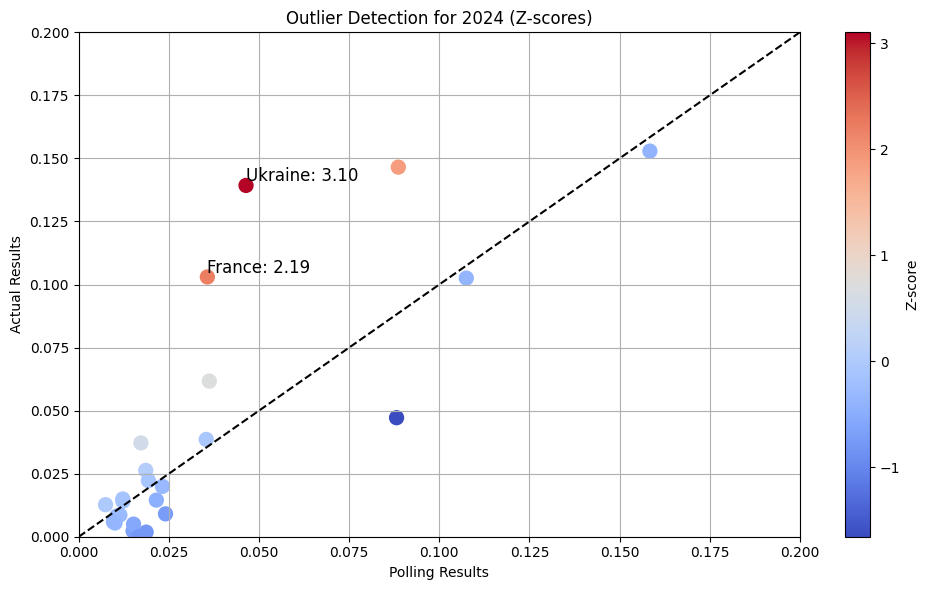

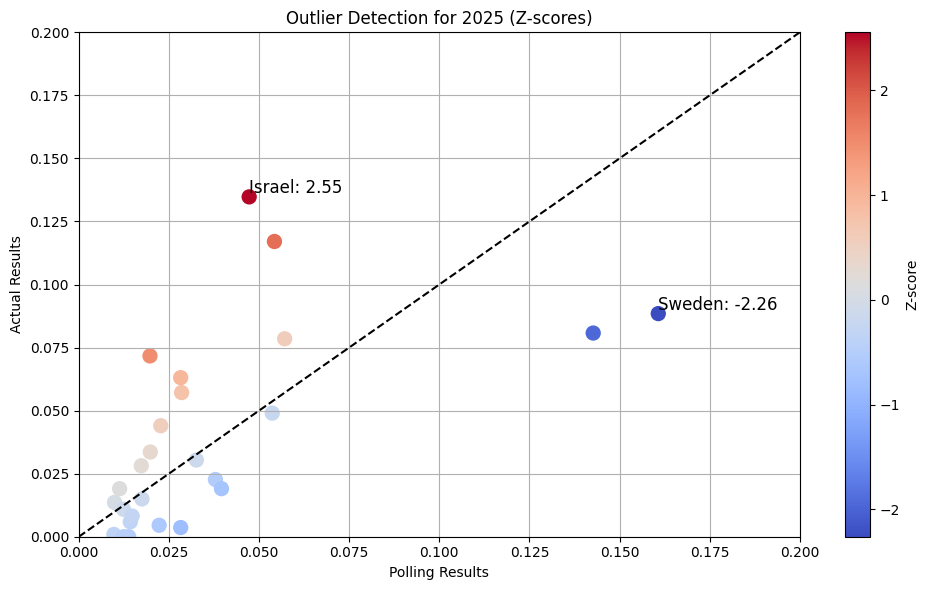

In [2]:
from analysis_tools import detect_outliers

for i in range(2021, 2026): 
    detect_outliers(i)

### Analysis of the outlier detection
- 2025 had 2 significant outliers with Z-scores > 2: Sweden and Israel
- 2 other outliers with Z-scores > 1.9: Austria and Estonia

Try: Outlier detecting when excluding these 4.

Correlation between polling and actual results for 2025 (excluding countries): 0.59 (p-value: 3.50e-03)


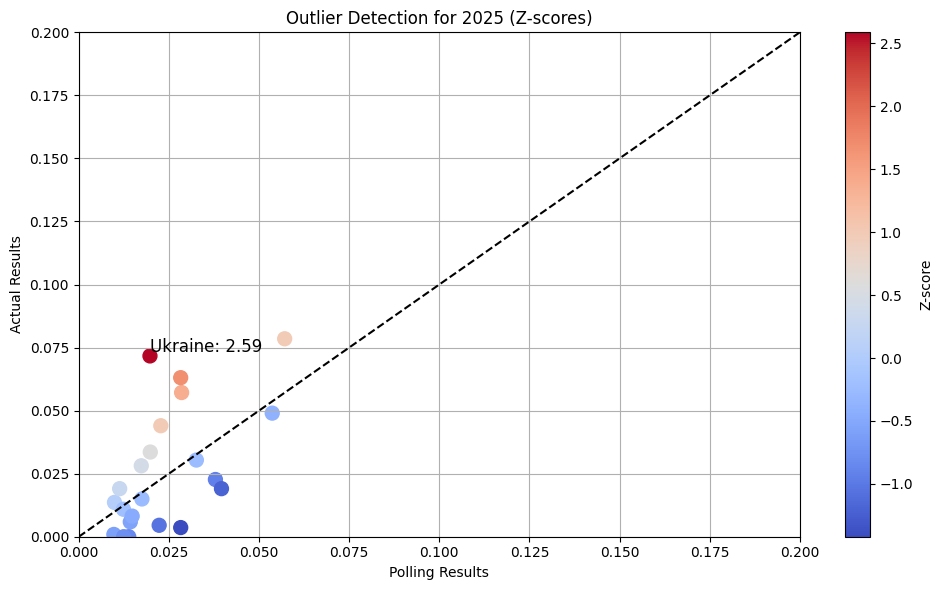

In [3]:
from analysis_tools import detect_outliers_excluding_countries

detect_outliers_excluding_countries(2025, ["Sweden", "Israel", "Estonia", "Austria"])

### It should be noted that the correlation factor remained the same when the outliers were removed
- Most likely because part of the share of the votes predicted to go to Austria and Sweden was evenly distributed among the other non-outlier values. 

## This points towards a clear qualitative explanation for the difference in voter behavior: Reduced turnout among Eurovision fans
### - Explanation: 

(Definition of Eurovision fans: Fans that would interact with the competition outside of the competition night, for instance through knowing and listening to the songs in advance. Assumed to be the same group that would engage with pre-ESC polling.)

There are 2 signs of this: 
- Estonia performing well as the "meme-song", over-performing Sweden's "meme song" that was heavily favored in the pre-ESC polling by Eurovision fans. The Estonian meme-song was more whimsical and could thus have appealed to the more casual segment of eurovision viewers, who only watch it during the event. The favorability of Sweden's song was high among Eurovision fans, but if their turnout was reduced, this would be a forseeable result. 
- Israel's vote point share was not significantly impacted from 2024 to 2025, despite their song being way less favored by eurovision fans in the polling. This points to a limited number of eurovision fans voting for it both years, and a large number of political votes. With a low Eurovision fan turnout, the political voting block was not countered by the fan voting block, leading to the fan-preferred songs to both underperform. It is assumed to be unlikely that the 2025 Israeli song was better at driving political turnout compared to the 2024 Israeli song, due to both songs being political in nature and 2024 being closer temporally to Oct 7th. The absolute number of votes for the Israeli songs of 2024 and 2025 is thus assumed to be approximately constant.
  
A potential explanation for this is fan boycotts. The same group that would engage with the pre-ESC polling are most likely in tune with the competition, having opinions about Israel's participation. If these chose not to vote, as voting would support the organization which platforms the Israeli participants, one would see results similar to the results gotten in 2025. 

The only way of confirming this would be to see if the total number of votes in the countries where Israel overperformed the expectations differed between the year 2024 and 2025. If it did, this would be a very satisfactory explanation for the change in voter behavior. 

## The second part of the null hypothesis thus cannot be rejected as the results would point to a biased selection of respondents for the pre-ESC polling.

### What should be noted is that rule breaking efforts from Israel seems to have an impact on non-fan voting behavior
1. Ads shared by the Israeli government on social media, encouraging voting for their song seems to have had an effect on non-fan voters. This is a violation of the ESC rules. 
2. The song's political nature seems to drive turnout from viewers that are not participating in the polling. It is the second year in a row that Israel sends an overtly political song to the ESC. This is a violation of the ESC rules. 
3. Israel being allowed to break the ESC rules may contribute to the reduced turnout among fans, as it leads to a distrust of the EBU and a reduced willingness to participate in the voting. 

What should be investigated is the voting behavior in Australia, as Israel got a 12 from them, despite Eurovision fans not favoring the Israeli song, and the buy-in to watch Eurovision in Australia being high, due to the time zone difference. This could illustrate the effects of the boycott combined with the Israeli efforts of driving non-fan turnout thourgh rule-breaking behavior. It could also point towards the usage of VPN-VOIP-voting from Israel, although there is no direct evidence of this, and such a strong claim should only be made when all other options are exhausted. I find it more likely that the Eurovision boycott is having a significant effect on fan turnout, which would also explain these results. 

You can check my work and contribute to this analysis by visiting the project's github: https://github.com/kth-fabfor/Eurovision-Analysis